In [1]:
import numpy as np
import os
from pImpactR import MLI as mli
from pImpactR import opt
from pImpactR.util import Me
from copy import deepcopy as copy
import time
import pickle
import matplotlib.pyplot as plt

In [2]:
nCore_y = 2
nCore_z = 2

nturn = 1024
npt = 64
std = 0.05
Espread = 2.0e-3

NL_L = 1.8
NL_t = 0.4
NL_c = 0.01
NL_nu = 0.3

alfx = np.tan(np.pi*NL_nu)
betx = NL_L/np.sin(2.0*np.pi*NL_nu)
k = 2*alfx/betx
k

1.4544633270832747

# Original Settings

In [3]:
elems0,lattices,labor = mli.readInputfile('mli.in.origin')

setarclen is not recognized. skipping...
autoconcat is not recognized. skipping...
autoapply is not recognized. skipping...
reftraj is not recognized. skipping...
fit is not recognized. skipping...
bip is not recognized. skipping...
tip is not recognized. skipping...


In [4]:
energy=elems0[0].energy*1.0e9
gam0 = energy/Me
bet0 = np.sqrt(1.0-1.0/gam0**2)

In [5]:
elems = []
for item in elems0:
    if not item.name in ['tasm','aim','vary','clear','anaprint']:
        elems.append(item)

In [6]:
labor = ['iotaline','mapout','fin']

# thick sext 2 thin multipole

In [7]:
elemList,latticeList=mli.sext2thin(elems,lattices,brho=0.50204778184582999)

In [8]:
indexThin = []
for i,item in enumerate(elemList):
    if 'thlm' == item.elem:
        indexThin.append(i)
nThin = len(indexThin)
print(nThin)

with open('result.thin.sext.oct','rb') as fp:
    result=pickle.load(fp)

for i,j in enumerate(indexThin):
    elemList[j]['k2l']=result.x[i]
for i,j in enumerate(indexThin):
    elemList[j]['k3l']=result.x[i+nThin]

18


In [9]:
mli.writeInputfile(elemList,latticeList,labor)
mli.run()
M0,G=mli.readTransferMap()

In [10]:
M0

,1,2,3,4,5,6
1,0.999968,0.000070,0.000000,0.000000e+00,0.0,-1.147949e-06
2,-1.454445,0.999930,0.000000,0.000000e+00,0.0,-2.587771e-07
3,0.000000,0.000000,0.999995,3.984744e-07,0.0,0.000000e+00
4,0.000000,0.000000,-1.454438,1.000004e+00,0.0,0.000000e+00
5,0.000002,-0.000001,0.000000,0.000000e+00,1.0,-1.297155e+00
6,0.000000,0.000000,0.000000,0.000000e+00,0.0,1.000000e+00


# mli2impact

In [11]:
from pImpactR import mli2impact

In [12]:
beam=mli2impact.beam(elemList)
lattice=mli2impact.lattice(elemList,latticeList[0])

beam.n_particles=npt
beam.nCore_y = nCore_y
beam.nCore_z = nCore_z

ke = beam.kinetic_energy
freq = beam.frequency
mass = beam.mass
gam0 = 1.0+beam.kinetic_energy/mass
bet0 = np.sqrt(1.0-1.0/gam0**2)
bg0  = np.sqrt(gam0**2-1.0)
q_m  = beam.multi_charge.q_m[0]

marker is not recognized. skipping...
monitor is not recognized. skipping...
quadrupole strength not found in the following MLI element:

 elem: 'quadrupole'
 name: 'sqb2r'
    l: 0.1
  k1s: 0
quadrupole strength not found in the following MLI element:

 elem: 'quadrupole'
 name: 'sqc1r'
    l: 0.1
  k1s: 0
monitor is not recognized. skipping...
monitor is not recognized. skipping...
quadrupole strength not found in the following MLI element:

 elem: 'quadrupole'
 name: 'sqc2r'
    l: 0.1
  k1s: 0
monitor is not recognized. skipping...
quadrupole strength not found in the following MLI element:

 elem: 'quadrupole'
 name: 'sqd1r'
    l: 0.1
  k1s: 0
marker is not recognized. skipping...
marker is not recognized. skipping...
quadrupole strength not found in the following MLI element:

 elem: 'quadrupole'
 name: 'sqd2r'
    l: 0.1
  k1s: 0
monitor is not recognized. skipping...
monitor is not recognized. skipping...
quadrupole strength not found in the following MLI element:

 elem: 'qua

In [13]:
beam


         nCore_y: 2
         nCore_z: 2
             dim: 6
     n_particles: 64
      integrator: 'Linear'
     error_study: False
 standard_output: 'standard output'
         restart: False
        subcycle: False
         current: 0.0 [A]
  kinetic_energy: 150000007.09 [eV]
            mass: 510998.91 [eV]
          charge: -1.0 [e]
       frequency: 30000000.0 [Hz]
           phase: 0.0 [rad]
            mesh: 'mesh' class
    distribution: 'distribution' class
    multi_charge: 'multi_charge' class

In [14]:
import pImpactR as impact

In [15]:
M=impact.getTransferMap(beam,lattice)
M

,0,1,2,3,4,5
0,0.999969,0.000070,-3.102372e-08,-5.540068e-07,0.0,7.627056e-15
1,-1.454445,0.999931,1.179630e-08,2.450681e-07,0.0,1.719333e-15
2,0.000000,0.000000,9.999954e-01,3.990508e-07,0.0,0.000000e+00
3,0.000000,0.000000,-1.454438e+00,1.000004e+00,0.0,0.000000e+00
4,0.000053,-0.001828,-1.034939e-05,-9.826143e-04,1.0,3.105050e-07
5,-0.000000,-0.000000,-0.000000e+00,-0.000000e+00,-0.0,1.000000e+00


In [16]:
loop=impact.getElem('loop')
loop.turns = nturn

nlinsert=impact.getElem('nonlinear_insert')
nlinsert.length=NL_L
nlinsert.strength_t=NL_t
nlinsert.transverse_scale_c=NL_c
nlinsert.tune_advance=NL_nu

lattice = [loop,nlinsert] + lattice

In [17]:
indexThin = []
for i,item in enumerate(lattice):
    if 'multipole_thin' == item.type:
        indexThin.append(i)
nThin = len(indexThin)

In [18]:
elemTBT = impact.getElem('TBT_integral')
elemTBT.strength_t = NL_t
elemTBT.transverse_scale_c = NL_c
elemTBT.betx = betx
elemTBT.alfx = alfx
elemTBT.file_id = 10
elemTBT.pID_begin = 1
elemTBT.pID_end = npt

elemTBT_old = impact.getElem('TBT_integral_onMomentum')
elemTBT_old.strength_t = NL_t
elemTBT_old.transverse_scale_c = NL_c
elemTBT_old.betx = betx
elemTBT_old.alfx = alfx
elemTBT_old.file_id = 11
elemTBT_old.pID_begin = 1
elemTBT_old.pID_end = npt

popout = lattice.pop(-1)
lattice.append(elemTBT)
lattice.append(elemTBT_old)

In [19]:
def Impact2norm(data_in,bg0,bet0,sign=1):
    data=data_in.copy()
    data[:,5] = -(np.sqrt(1.0-2.0*data[:,5]/mass/(bet0*bg0)+(data[:,5]/mass)**2/bg0**2)-1.0)
    data[:,1] = (data[:,0]*alfx*sign/np.sqrt(betx) + data[:,1]/(1+data[:,5])*np.sqrt(betx))/NL_c
    data[:,3] = (data[:,2]*alfx*sign/np.sqrt(betx) + data[:,3]/(1+data[:,5])*np.sqrt(betx))/NL_c
    data[:,0] = data[:,0]/(np.sqrt(betx)*NL_c)
    data[:,2] = data[:,2]/(np.sqrt(betx)*NL_c)
    return data
    
def norm2Impact(data_in,bg0,bet0,sign=1):
    data=data_in.copy()
    data[:,1] = (-data[:,0]*alfx*sign + data[:,1])*NL_c/np.sqrt(betx)*(1+data[:,5])
    data[:,3] = (-data[:,2]*alfx*sign + data[:,3])*NL_c/np.sqrt(betx)*(1+data[:,5])
    data[:,0] = data[:,0]*np.sqrt(betx)*NL_c
    data[:,2] = data[:,2]*np.sqrt(betx)*NL_c
    data[:,5] = (bg0*np.sqrt(1/bet0**2+2.0*data[:,5]+data[:,5]**2)-bg0/bet0)*mass
    return data

In [20]:
from scipy.stats import truncnorm

def get_truncated_normal(mean=0, sd=1, low=0, upp=10,n=1):
    f = truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
    return f.rvs(n)

In [21]:
x=get_truncated_normal(sd=std,low=-2.0*std,upp=2.0*std,n=npt*5)
pData0=np.zeros([npt,9])
pData0[:,[0,1,2,3,5]]=x.reshape([npt,5])
pData0[:,5] = pData0[:,5]/std*Espread
pData0[:,6] = q_m
pData0[:,-1] = np.arange(1,npt+1)
pData = norm2Impact(pData0,bg0,bet0)
impact.writeParticleData(pData,ke,mass,freq)

In [22]:
def track(arg=None):
    if arg!=None:
        for i,j in enumerate(indexThin):
            lattice[j]['KL_sext']=arg[i]
        for i,j in enumerate(indexThin):
            lattice[j]['KL_oct']=arg[i+nThin]
        
    impact.writeInputFile(beam,lattice)
    impact.run(beam)
    dum,TBToff = impact.readTBT_integral(10)
    dum,TBTon = impact.readTBT_integral_onMomentum(11)
    print('npt=',len(dum))
    return dum,TBTon,TBToff

In [23]:
index1,TBTon1,TBToff1 = track()
index0,TBTon0,TBToff0 = track([0.0]*2*nThin)

npt= 37
npt= 64


In [24]:
print(index0)
print(index1)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64]
[ 2  3  4  5  7  8  9 12 14 15 16 19 20 24 25 27 31 33 34 35 37 39 40 41
 42 44 45 46 47 49 52 54 56 59 61 62 63]


In [25]:
index1_in_index0 = np.in1d(index1,index0)

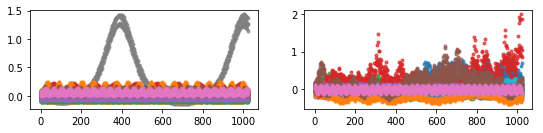

In [26]:
fig=plt.figure(figsize=(9,4))
plt.subplot(2,2,1)
for i,flag in enumerate(index1_in_index0):
    if flag:
        plt.plot((TBToff0[:,0,i]/TBToff0[0,0,i]-1.0),marker='.',ls='',alpha=0.7)
plt.subplot(2,2,2)
for i,flag in enumerate(index1_in_index0):
    if flag:
        plt.plot((TBToff1[:,0,i]/TBToff1[0,0,i]-1.0),marker='.',ls='',alpha=0.7)

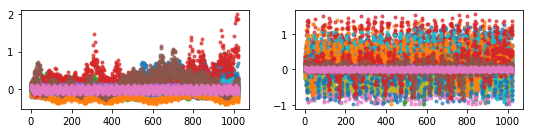

In [27]:
fig=plt.figure(figsize=(9,4))
plt.subplot(2,2,1)
for i in range(len(index1)):
    plt.plot((TBToff1[:,0,i]/TBToff1[0,0,i]-1.0),marker='.',ls='',alpha=0.7)
plt.subplot(2,2,2)
for i in range(len(index1)):
    plt.plot((TBToff1[:,1,i]/TBToff1[0,1,i]-1.0),marker='.',ls='',alpha=0.7)